# Comparison Between the Microwave Uncertainty Framework and The Current Calibration Services Work Flow 05/2017 for a one-port 3.5mm system

This Notebook summarizes the comparison between using the current calibration services workflow and the microwave uncertainty framework to derive both nominal values and uncertainties. The data used in this comparison was acquired by Ron Ginley and ...

The comparison centers on the following data sources:
1. The measurement of devices M105,M110,N101,N202,N203, N205. 
2. Comparisons incorporate the raw values, the nominal value returned by the MUF, the mean of montecarlo values returned by the MUF.
3. Uncertainty calculations use calrep, the sensitivity analysis from the MUF and the montecarlo analysis from the MUF.


In [1]:
from pyMeasure import *

Importing pyMeasure, this should take roughly 30 seconds
The module smithplot was not found,please put it on the python path
The module smithplot was not found,please put it on the python path


## Device M105

In [24]:
raw_directory=r"C:\Share\35CalComp\35_ascii_results"
montecarlo_directory=r"C:\Share\35CalComp\MUF_results\DUTs\M105P1_Support\MonteCarlo"
sensitivity_directory=r"C:\Share\35CalComp\MUF_results\DUTs\M105P1_Support\Covariance"
nominal_path=r"C:\Share\35CalComp\MUF_results\DUTs\M105P1_Support\M105P1_0.s2p"

In [25]:
measurement_names=['M105P1.L1_030716','M105P2.L1_030716']
model_name=sparameter_power_type(os.path.join(raw_directory,measurement_names[0]))
#raw_type(os.path.join(raw_directory,'M105P1.L1_030716'))
model=globals()[model_name]
measurements=map(lambda x:model(os.path.join(raw_directory,x)),measurement_names)


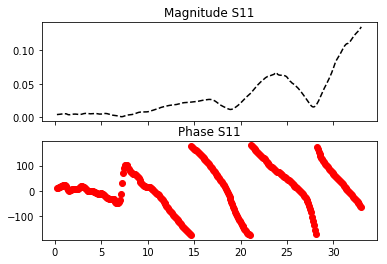

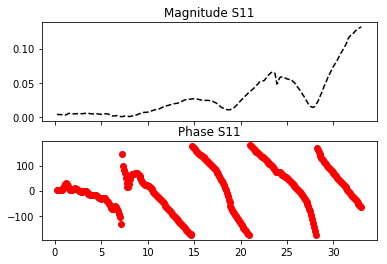

In [4]:
for measurement in measurements:
    measurement.show();


In [26]:
calrep_measurements=map(lambda x: calrep(x), measurements)

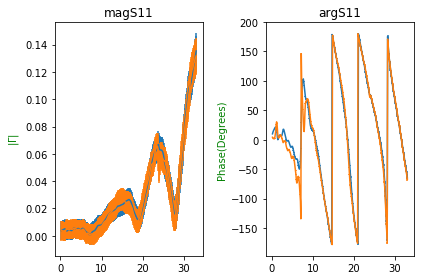

In [6]:
plot_calrep_comparison(calrep_measurements);

In [27]:
montecarlo_reference_curve=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,format="MA")
sensitivity_reference_curve=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                               sensitivity_directory=sensitivity_directory,format="MA")

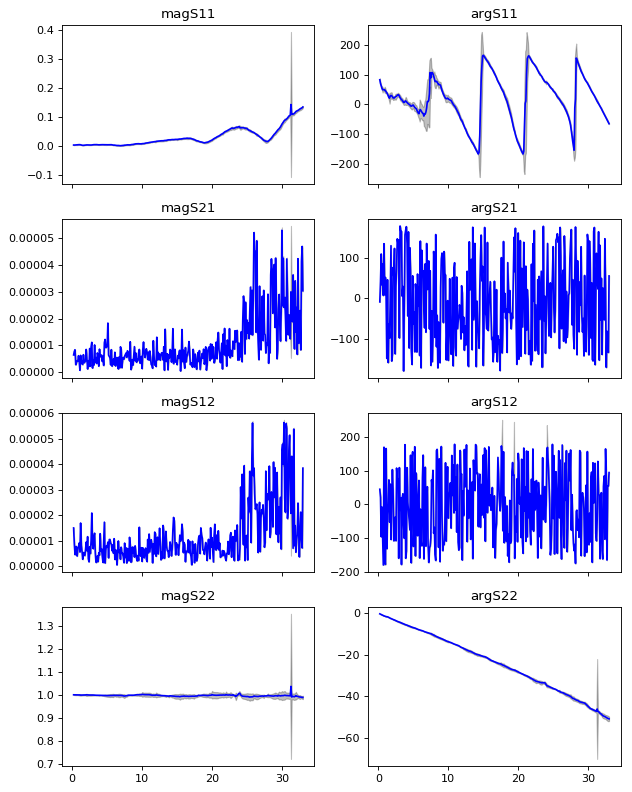

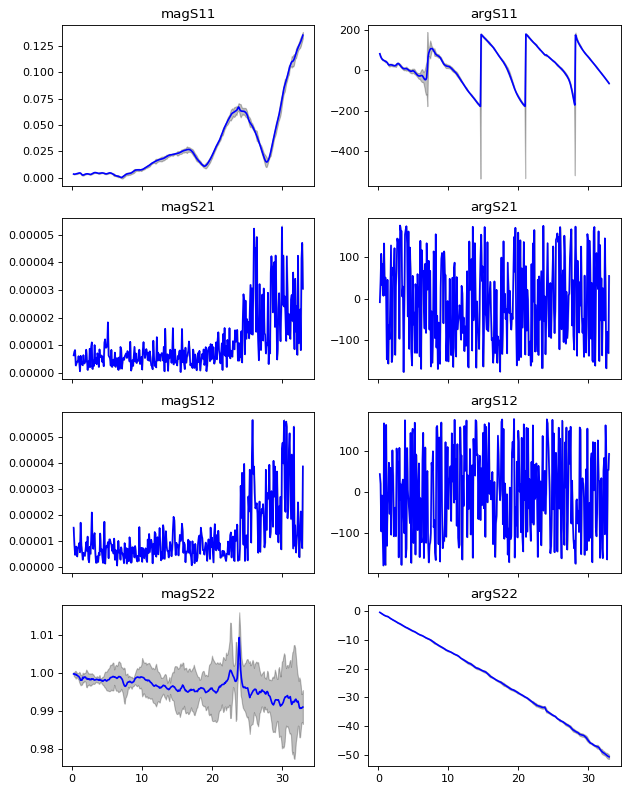

In [8]:
plot_reference_curve(montecarlo_reference_curve);
plot_reference_curve(sensitivity_reference_curve);

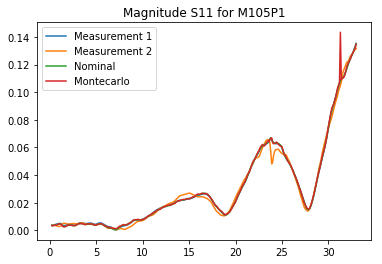

In [9]:
# Now plot all of these together at once
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["magS11"],label=labels[index])
plt.legend()
plt.title("Magnitude S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

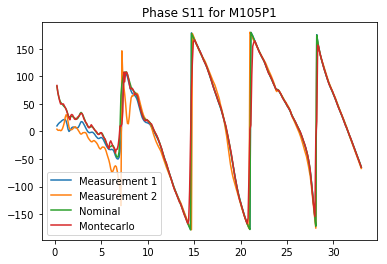

In [29]:
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["argS11"],label=labels[index])
plt.legend()
plt.title("Phase S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

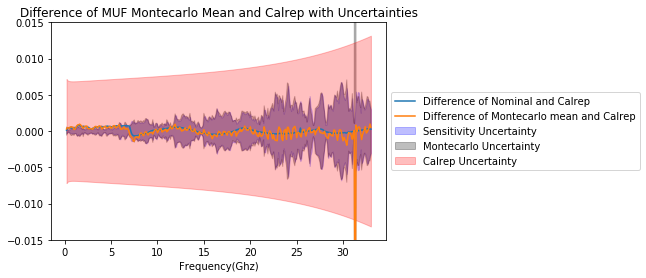

In [11]:
montecarlo_mag=np.array(montecarlo_reference_curve["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["umagS11"])
measurement_1_mag=np.array(calrep_measurements[0]["magS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uMgS11"])
nominal_mag=np.array(sensitivity_reference_curve["magS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["umagS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([-.015,.015])
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

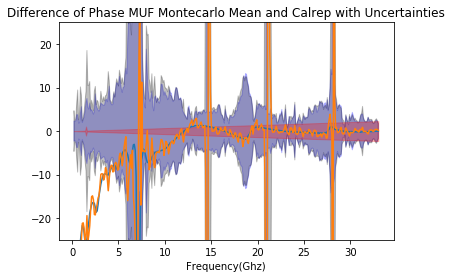

In [12]:
montecarlo_mag=np.array(montecarlo_reference_curve["argS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["uargS11"])
measurement_1_mag=np.array(calrep_measurements[0]["argS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uAgS11"])
nominal_mag=np.array(sensitivity_reference_curve["argS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["uargS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
#plt.legend()
plt.ylim([-25,25])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

## Device M110

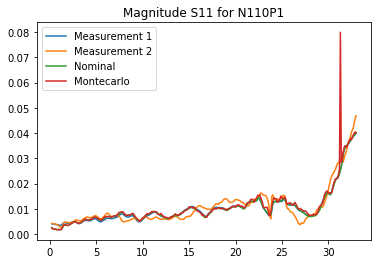

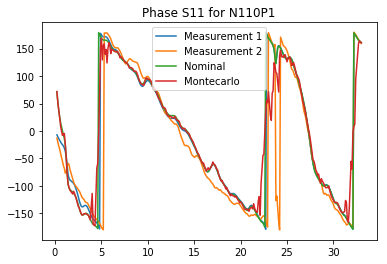

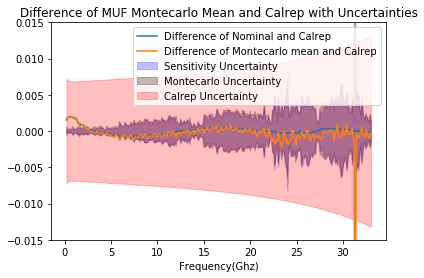

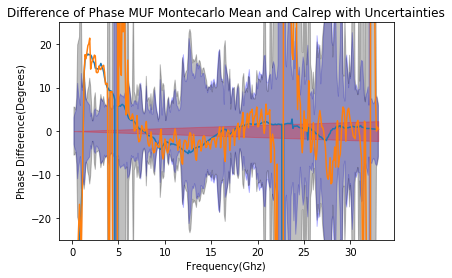

In [13]:
raw_directory=r"C:\Share\35CalComp\35_ascii_results"
montecarlo_directory=r"C:\Share\35CalComp\MUF_results\DUTs\M110P1_Support\MonteCarlo"
sensitivity_directory=r"C:\Share\35CalComp\MUF_results\DUTs\M110P1_Support\Covariance"
nominal_path=r"C:\Share\35CalComp\MUF_results\DUTs\M110P1_Support\M110P1_0.s2p"
measurement_names=['M110P1.L1_030716','M110P2.L1_030716']
model_name=sparameter_power_type(os.path.join(raw_directory,measurement_names[0]))
#raw_type(os.path.join(raw_directory,'M105P1.L1_030716'))
model=globals()[model_name]
measurements=map(lambda x:model(os.path.join(raw_directory,x)),measurement_names)
calrep_measurements=map(lambda x: calrep(x), measurements)
montecarlo_reference_curve=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,format="MA")
sensitivity_reference_curve=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                               sensitivity_directory=sensitivity_directory,format="MA")
# Now plot all of these together at once mag first
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["magS11"],label=labels[index])
plt.legend()
plt.title("Magnitude S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

# now phase
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["argS11"],label=labels[index])
plt.legend()
plt.title("Phase S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

#now the difference of mag for measurement one
montecarlo_mag=np.array(montecarlo_reference_curve["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["umagS11"])
measurement_1_mag=np.array(calrep_measurements[0]["magS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uMgS11"])
nominal_mag=np.array(sensitivity_reference_curve["magS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["umagS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend()
plt.ylim([-.015,.015])
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show();

#now the phase
montecarlo_mag=np.array(montecarlo_reference_curve["argS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["uargS11"])
measurement_1_mag=np.array(calrep_measurements[0]["argS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uAgS11"])
nominal_mag=np.array(sensitivity_reference_curve["argS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["uargS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.ylabel("Phase Difference(Degrees)")
#plt.legend()
plt.ylim([-25,25])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

## Device N101


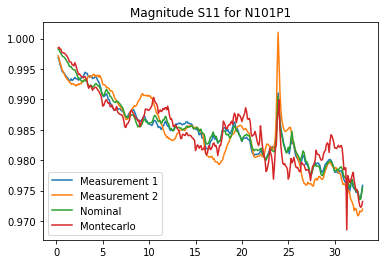

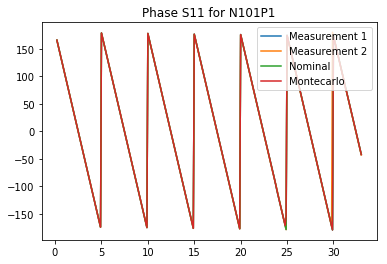

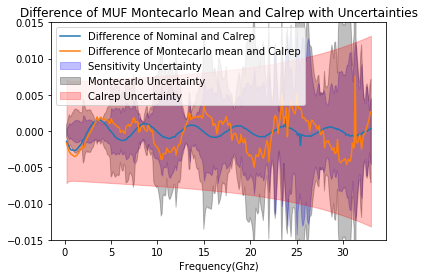

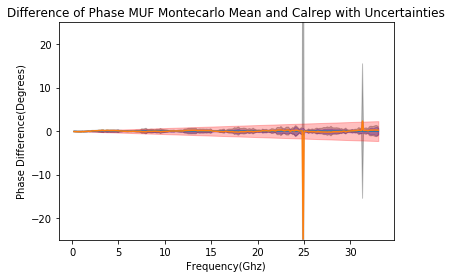

In [14]:
raw_directory=r"C:\Share\35CalComp\35_ascii_results"
montecarlo_directory=r"C:\Share\35CalComp\MUF_results\DUTs\N101P1_Support\MonteCarlo"
sensitivity_directory=r"C:\Share\35CalComp\MUF_results\DUTs\N101P1_Support\Covariance"
nominal_path=r"C:\Share\35CalComp\MUF_results\DUTs\N101P1_Support\N101P1_0.s2p"
measurement_names=['N101P1.L1_030716','N101P2.L1_030716']
model_name=sparameter_power_type(os.path.join(raw_directory,measurement_names[0]))
#raw_type(os.path.join(raw_directory,'M105P1.L1_030716'))
model=globals()[model_name]
measurements=map(lambda x:model(os.path.join(raw_directory,x)),measurement_names)
calrep_measurements=map(lambda x: calrep(x), measurements)
montecarlo_reference_curve=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,format="MA")
sensitivity_reference_curve=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                               sensitivity_directory=sensitivity_directory,format="MA")
# Now plot all of these together at once mag first
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["magS11"],label=labels[index])
plt.legend()
plt.title("Magnitude S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

# now phase
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["argS11"],label=labels[index])
plt.legend()
plt.title("Phase S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

#now the difference of mag for measurement one
montecarlo_mag=np.array(montecarlo_reference_curve["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["umagS11"])
measurement_1_mag=np.array(calrep_measurements[0]["magS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uMgS11"])
nominal_mag=np.array(sensitivity_reference_curve["magS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["umagS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend()
plt.ylim([-.015,.015])
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show();

#now the phase
montecarlo_mag=np.array(montecarlo_reference_curve["argS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["uargS11"])
measurement_1_mag=np.array(calrep_measurements[0]["argS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uAgS11"])
nominal_mag=np.array(sensitivity_reference_curve["argS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["uargS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.ylabel("Phase Difference(Degrees)")
#plt.legend()
plt.ylim([-25,25])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

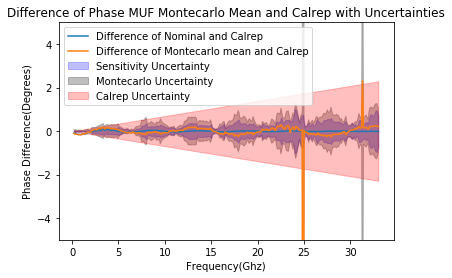

In [15]:
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.ylabel("Phase Difference(Degrees)")
#plt.legend()
plt.ylim([-5,5])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.legend()
plt.show()

In [16]:
def unwrap_phase(phase_list):
    """Takes a phase list and returns one without any jumps greater than 90 degrees, units are assumed to be degrees"""
    phase_list_copy=phase_list[:]
    i=1
    n=0
    while(i+1<len(phase_list)):
        if abs(phase_list[i]-phase_list[i-1])>90:
            if phase_list[i]-phase_list[i-1]>0:
                n+=1
            else:
                n-=1
            phase_list_copy[i]=phase_list_copy[i+1]-n*360        
        phase_list_copy[i+1]=phase_list_copy[i+1]-n*360
        i+=1    

    return phase_list_copy


        

In [17]:
%matplotlib?

In [18]:
%matplotlib qt5
f=measurements[0]["Frequency"]
plt.plot(f,unwrap_phase(measurements[0]["argS11"]))
plt.plot(f,measurements[0]["argS11"])
plt.show()

In [19]:
unwrap_phase(measurements[0]["argS11"])[-1]

-2202.069

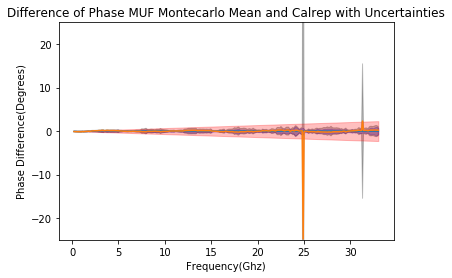

In [20]:
%matplotlib inline
#now the phase
montecarlo_mag=np.array(unwrap_phase(montecarlo_reference_curve["argS11"]))
montecarlo_uncertainty=np.array(montecarlo_reference_curve["uargS11"])
measurement_1_mag=np.array(unwrap_phase(calrep_measurements[0]["argS11"]))
measurement_1_uncertainty=np.array(calrep_measurements[0]["uAgS11"])
nominal_mag=np.array(unwrap_phase(sensitivity_reference_curve["argS11"]))
nominal_uncertainty=np.array(sensitivity_reference_curve["uargS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.ylabel("Phase Difference(Degrees)")
#plt.legend()
plt.ylim([-25,25])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

In [21]:
test=OnePortRawModel(os.path.join(raw_directory,'M110P2.L1_030716'))

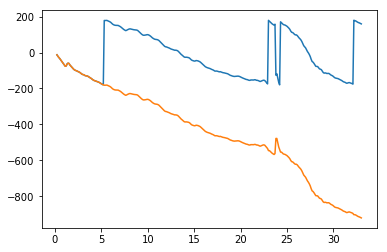

In [22]:
plt.plot(test["Frequency"],test["argS11"])
plt.plot(test["Frequency"],unwrap_phase(test["argS11"]))

In [78]:
montecarlo_directories=[r"C:\Share\35CalComp\Montecarlo_Test\N_10\DUTs\M105P1_Support\MonteCarlo",
                        r"C:\Share\35CalComp\Montecarlo_Test\N_100\DUTs\M105P1_Support\MonteCarlo",
                        r"C:\Share\35CalComp\Montecarlo_Test\N_1000\DUTs\M105P1_Support\MonteCarlo",
                        r"C:\Share\35CalComp\Montecarlo_Test\N_10000\DUTs\M105P1_Support\MonteCarlo"]
sensitivity_directory=r"C:\Share\35CalComp\Montecarlo_Test\N_10\DUTs\M105P1_Support\Covariance"
nominal_path=r"C:\Share\35CalComp\Montecarlo_Test\N_10\DUTs\M105P1_Support\M105P1_0.s2p"

m105_sensitvity=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                   sensitivity_directory=sensitivity_directory,format="MA")
m105_montecarlo=map(lambda x: create_monte_carlo_reference_curve(monte_carlo_directory=x,format="MA"),montecarlo_directories)

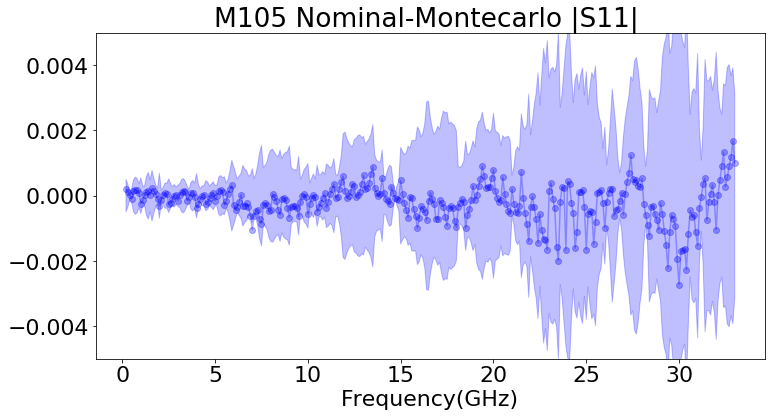

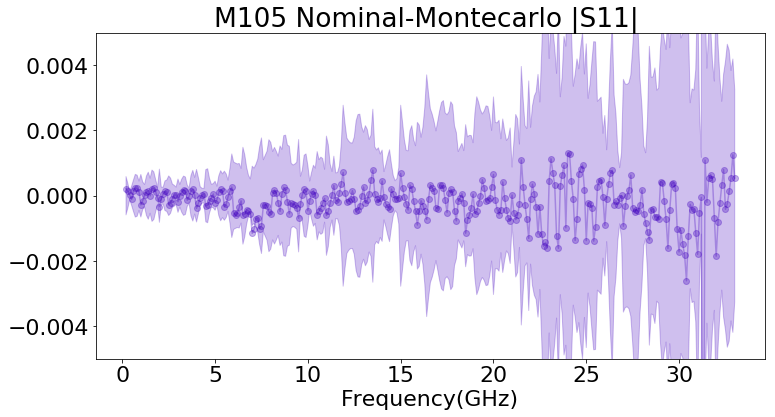

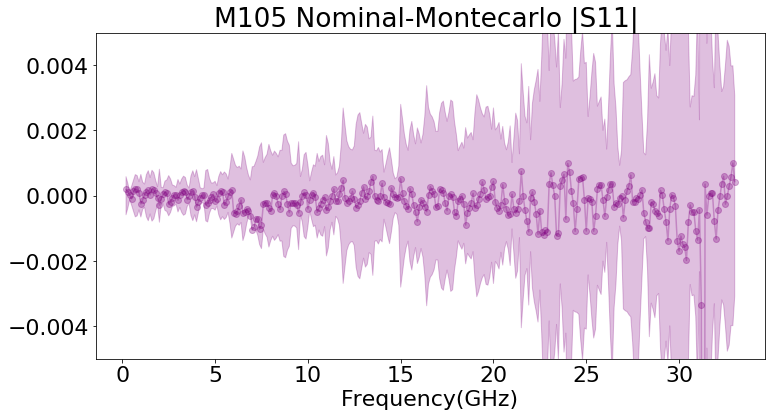

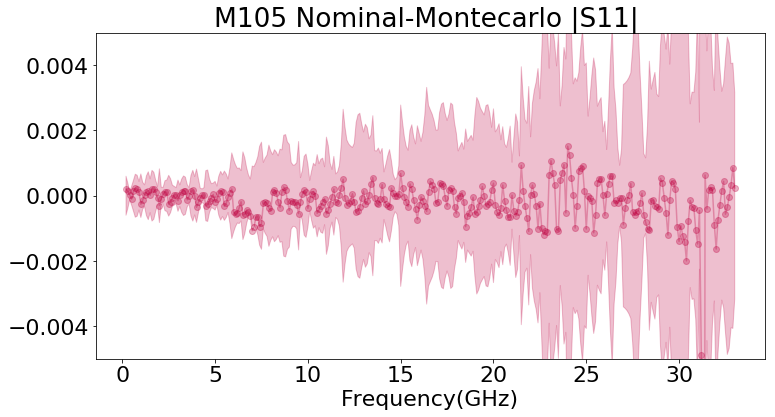

In [93]:
plt.rc('axes', color_cycle=['r', 'g', 'b', 'y'])
for index,montecarlo in enumerate(m105_montecarlo):
    plt.close()
    colors=(float(1.*index/len(m105_montecarlo)),0,float(1-1.*index/len(m105_montecarlo)))
    plt.rcParams.update({'font.size': 22,'figure.figsize':(12,6)})
    montecarlo_magS11=np.array(montecarlo["magS11"])
    sensitivity_magS11=np.array(m105_sensitvity["magS11"])
    uncert_sensitvity=np.array(m105_sensitvity["umagS11"])
    uncert_montecarlo=np.array(montecarlo["umagS11"])
    f=np.array(m105_sensitvity["Frequency"])
    plt.plot(f,sensitivity_magS11-montecarlo_magS11,'-o',label="N = {0}".format(10**(index+1)),alpha=.3,color=colors)
    plt.fill_between(f,-1*uncert_montecarlo,uncert_montecarlo,
                        alpha=.25,
                        edgecolor="black",label="N = {0}".format(10**(index+1)),color=colors)

    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim([-.005,.005])
    plt.xlabel("Frequency(GHz)")
    plt.title("M105 Nominal-Montecarlo |S11| ")
    plt.savefig(r"C:\Share\35CalComp\Plots\MonteCarlo_Trial_Size_Test_Uncertainty_{0}.png".format(10**(index+1)),
        bbox_inches='tight') 
    plt.show()

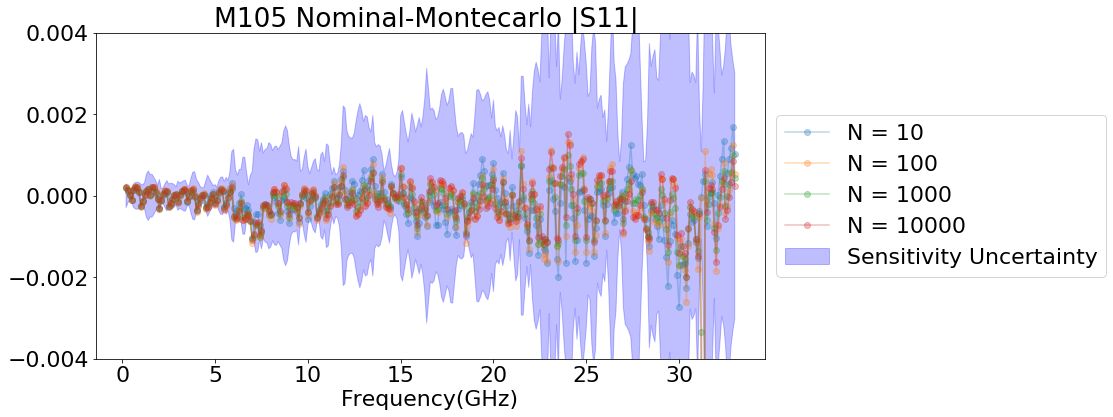

In [79]:
plt.close()
plt.rcParams.update({'font.size': 22,'figure.figsize':(12,6)})
for index,montecarlo in enumerate(m105_montecarlo):
    montecarlo_magS11=np.array(montecarlo["magS11"])
    sensitivity_magS11=np.array(m105_sensitvity["magS11"])
    uncert_sensitvity=np.array(m105_sensitvity["umagS11"])
    uncert_montecarlo=np.array(montecarlo["umagS11"])
    f=np.array(m105_sensitvity["Frequency"])
    plt.plot(f,sensitivity_magS11-montecarlo_magS11,'-o',label="N = {0}".format(10**(index+1)),alpha=.3)
plt.fill_between(f,-1*uncert_sensitvity,uncert_sensitvity,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([-.004,.004])
plt.xlabel("Frequency(GHz)")
plt.title("M105 Nominal-Montecarlo |S11| ")
plt.savefig(r"C:\Share\35CalComp\Plots\MonteCarlo_Trial_Size_Test.png",bbox_inches='tight') 
plt.show()

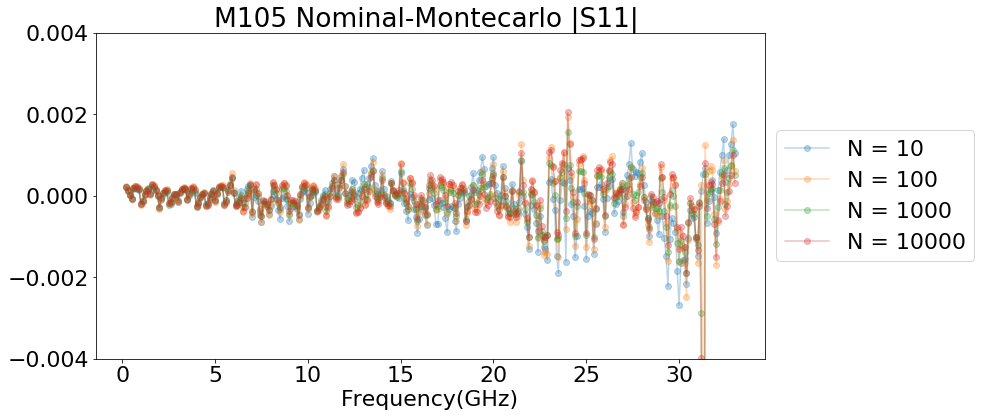

In [76]:
plt.close()
plt.rcParams.update({'font.size': 22,'figure.figsize':(12,6)})
for index,montecarlo in enumerate(m105_montecarlo):
    montecarlo_magS11=np.sqrt(np.array(montecarlo["reS11"])**2+np.array(montecarlo["imS11"])**2)
    sensitivity_magS11=np.sqrt(np.array(m105_sensitvity["reS11"])**2+np.array(m105_sensitvity["imS11"])**2)
    f=np.array(m105_sensitvity["Frequency"])
    plt.plot(f,sensitivity_magS11-montecarlo_magS11,'-o',label="N = {0}".format(10**(index+1)),alpha=.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([-.004,.004])
plt.xlabel("Frequency(GHz)")
plt.title("M105 Nominal-Montecarlo |S11| ")
plt.savefig(r"C:\Share\35CalComp\Plots\MonteCarlo_Trial_Size_Test.png",bbox_inches='tight') 
plt.show()
    
    
    

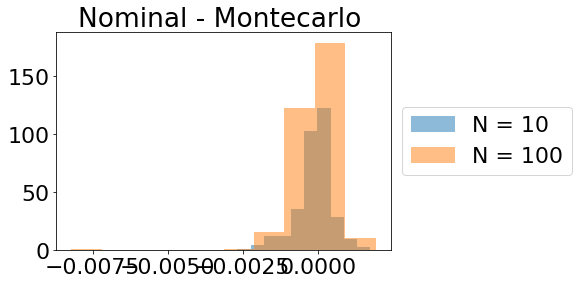

In [64]:
plt.close()
plt.rcParams.update({'font.size': 22})
bins = np.linspace(-.005, .005, 100)

for index,montecarlo in enumerate(m105_montecarlo[:2]):
    montecarlo_magS11=np.sqrt(np.array(montecarlo["reS11"])**2+np.array(montecarlo["imS11"])**2)
    sensitivity_magS11=np.sqrt(np.array(m105_sensitvity["reS11"])**2+np.array(m105_sensitvity["imS11"])**2)
    f=np.array(m105_sensitvity["Frequency"])
    plt.hist(sensitivity_magS11-montecarlo_magS11,label="N = {0}".format(10**(index+1)),alpha=.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Nominal - Montecarlo ")

plt.show()

# Comparison Plot For Raw and MUF.
1. Inputs: Raw File, Nominal File From MUF, Sensitivity Directory Form MUF, Montecarlo From MUF,options
2. Plot the Calrep, Nominal, Montecarlo 
3. Plot the difference of Calrep, Nominal and Montecarlo with Uncertainties

In [183]:
def plot_raw_MUF_comparison(raw_directory=r"C:\Share\35CalComp\35_ascii_results",
                            measurement_names=['N101P1.L1_030716','N101P2.L1_030716'],
                            nominal_path=r"C:\Share\35CalComp\MUF_results\DUTs\N101P1_Support\N101P1_0.s2p",
                            sensitivity_directory=r"C:\Share\35CalComp\MUF_results\DUTs\N101P1_Support\Covariance",
                            montecarlo_directory=r"C:\Share\35CalComp\MUF_results\DUTs\N101P1_Support\MonteCarlo",
                            **options):
    """Plots a comparison of results form the Microwave Uncertainty Framework and calrep given a raw file, nominal file, 
    a sensitivity directory and a montecarlo directory. 
    """

    # deal with options 
    defaults={"save_plots":False,"directory":None}
    comparison_options={}
    for key,value in defaults.iteritems():
        comparison_options[key]=value
    for key,value in options.iteritems():
        comparison_options[key]=value
    # load files into python classes 
    model_name=sparameter_power_type(os.path.join(raw_directory,measurement_names[0]))
    print model_name
    #raw_type(os.path.join(raw_directory,'M105P1.L1_030716'))
    model=globals()[model_name]
    measurements=map(lambda x:model(os.path.join(raw_directory,x)),measurement_names)
    calrep_measurements=map(lambda x: calrep(x), measurements)
    montecarlo_reference_curve=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,format="MA")
    sensitivity_reference_curve=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                                   sensitivity_directory=sensitivity_directory,format="MA")
    print("-"*80)
    print("{0}".format(measurements[0].metadata["Device_Id"]))
    
    # update global preferences
    plt.rcParams.update({'font.size': 22,'figure.figsize':(12,6)})
    
    # for one-port
    if re.search("one",model_name,re.IGNORECASE):
        combined_figure,axes=plt.subplots(nrows=1,ncols=2)
    # Now plot all of these together at once mag first
        data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
        labels=[]
        for index,data in enumerate(data_list):
            if index ==len(data_list)-1:
                labels.append("Montecarlo")
            elif index==len(data_list)-2:
                labels.append("Nominal")
            else:
                labels.append("Measurement {0}".format(index+1))
        for index,data in enumerate(data_list):
            axes[0].plot(data["Frequency"],data["magS11"],label=labels[index])


        # now phase

        for index,data in enumerate(data_list):
            axes[1].plot(data["Frequency"],data["argS11"],label=labels[index])
        axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        combined_figure,axes=plt.subplots(nrows=3,ncols=2)
        data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
        labels=[]
        for index,data in enumerate(data_list):
            if index ==len(data_list)-1:
                labels.append("Montecarlo")
            elif index==len(data_list)-2:
                labels.append("Nominal")
            else:
                labels.append("Measurement {0}".format(index+1))
        parameters=["S11","S21","S22"]
        for plot_index,plot_row in enumerate(axes):
        # Now plot all of these together at once mag first
            for index,data in enumerate(data_list):
                plot_row[0].plot(data["Frequency"],data["mag"+parameters[plot_index]],label=labels[index])
            # now phase
            for index,data in enumerate(data_list):
                plot_row[1].plot(data["Frequency"],data["arg"+parameters[plot_index]],label=labels[index])
            if plot_index==1:
                plot_row[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
            

# plot the difference with uncertainties
    
    plt.tight_layout()
    
    if re.search("One",model_name,re.IGNORECASE):
        #now the difference of mag for measurement one
        montecarlo_mag=np.array(montecarlo_reference_curve["magS11"])
        montecarlo_uncertainty=np.array(montecarlo_reference_curve["umagS11"])
        measurement_1_mag=np.array(calrep_measurements[0]["magS11"])
        measurement_1_uncertainty=np.array(calrep_measurements[0]["uMgS11"])
        nominal_mag=np.array(sensitivity_reference_curve["magS11"])
        nominal_uncertainty=np.array(sensitivity_reference_curve["umagS11"])
        difference_figure,difference_axes=plt.subplots(nrows=1,ncols=2)
        difference_axes[0].plot(sensitivity_reference_curve["Frequency"],
                                measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
        difference_axes[0].fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                            color="blue",
                            alpha=.25,
                            edgecolor="black",label="Sensitivity Uncertainty")
        difference_axes[0].plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
        difference_axes[0].fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                            color="black",
                            alpha=.25,
                            edgecolor="black",label="Montecarlo Uncertainty")
        difference_axes[0].fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                            color="red",
                            alpha=.25,
                            edgecolor="red",label="Calrep Uncertainty")
        montecarlo_arg=np.array(montecarlo_reference_curve["argS11"])
        montecarlo_arg_uncertainty=np.array(montecarlo_reference_curve["uargS11"])
        measurement_1_arg=np.array(calrep_measurements[0]["argS11"])
        measurement_1_arg_uncertainty=np.array(calrep_measurements[0]["uAgS11"])
        nominal_arg=np.array(sensitivity_reference_curve["argS11"])
        nominal_arg_uncertainty=np.array(sensitivity_reference_curve["uargS11"])
        difference_axes[1].plot(sensitivity_reference_curve["Frequency"],
                                measurement_1_arg-nominal_arg,
                                label="Difference of Nominal ")
        difference_axes[1].fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_arg_uncertainty,nominal_arg_uncertainty,
                                color="blue",
                                alpha=.25,
                                edgecolor="black",label="Sensitivity Uncertainty")
        difference_axes[1].plot(montecarlo_reference_curve["Frequency"],measurement_1_arg-montecarlo_arg,
                                label="Difference of Montecarlo ")
        difference_axes[1].fill_between(sensitivity_reference_curve["Frequency"] ,
                                        -1*montecarlo_arg_uncertainty,montecarlo_arg_uncertainty,
                                color="black",
                                alpha=.25,
                                edgecolor="black",label="Montecarlo Uncertainty")
        difference_axes[1].fill_between(sensitivity_reference_curve["Frequency"] ,
                                        -1*measurement_1_arg_uncertainty,measurement_1_arg_uncertainty,
                                color="red",
                                alpha=.25,
                                edgecolor="red",label="Calrep Uncertainty")

        difference_axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        #difference_axes[1].set_ylim(ymin=-5, ymax=5)
        #difference_axes[0].set_ylim(ymin=-.025, ymax=.025)
    else:
        parameters=["S11","S21","S22"]
        difference_figure,difference_axes=plt.subplots(nrows=3,ncols=2)
        for plot_index,plot_row in enumerate(difference_axes):
            parameter=parameters[plot_index]
            montecarlo_mag=np.array(montecarlo_reference_curve["mag"+parameter])
            montecarlo_uncertainty=np.array(montecarlo_reference_curve["umag"+parameter])
            measurement_1_mag=np.array(calrep_measurements[0]["mag"+parameter])
            measurement_1_uncertainty=np.array(calrep_measurements[0]["uMg"+parameter])
            nominal_mag=np.array(sensitivity_reference_curve["mag"+parameter])
            nominal_uncertainty=np.array(sensitivity_reference_curve["umag"+parameter])
            plot_row[0].plot(sensitivity_reference_curve["Frequency"],
                                measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
            plot_row[0].fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                            color="blue",
                            alpha=.25,
                            edgecolor="black",label="Sensitivity Uncertainty")
            plot_row[0].plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
            plot_row[0].fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                            color="black",
                            alpha=.25,
                            edgecolor="black",label="Montecarlo Uncertainty")
            plot_row[0].fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                            color="red",
                            alpha=.25,
                            edgecolor="red",label="Calrep Uncertainty")
            montecarlo_arg=np.array(montecarlo_reference_curve["arg"+parameter])
            montecarlo_arg_uncertainty=np.array(montecarlo_reference_curve["uarg"+parameter])
            measurement_1_arg=np.array(calrep_measurements[0]["arg"+parameter])
            measurement_1_arg_uncertainty=np.array(calrep_measurements[0]["uAg"+parameter])
            nominal_arg=np.array(sensitivity_reference_curve["arg"+parameter])
            nominal_arg_uncertainty=np.array(sensitivity_reference_curve["uarg"+parameter])
            plot_row[1].plot(sensitivity_reference_curve["Frequency"],
                                measurement_1_arg-nominal_arg,
                                label="Difference of Nominal ")
            plot_row[1].fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_arg_uncertainty,nominal_arg_uncertainty,
                                color="blue",
                                alpha=.25,
                                edgecolor="black",label="Sensitivity Uncertainty")
            plot_row[1].plot(montecarlo_reference_curve["Frequency"],measurement_1_arg-montecarlo_arg,
                                label="Difference of Montecarlo ")
            plot_row[1].fill_between(sensitivity_reference_curve["Frequency"] ,
                                        -1*montecarlo_arg_uncertainty,montecarlo_arg_uncertainty,
                                color="black",
                                alpha=.25,
                                edgecolor="black",label="Montecarlo Uncertainty")
            plot_row[1].fill_between(sensitivity_reference_curve["Frequency"] ,
                                        -1*measurement_1_arg_uncertainty,measurement_1_arg_uncertainty,
                                color="red",
                                alpha=.25,
                                edgecolor="red",label="Calrep Uncertainty")
            if plot_index==1:
                plot_row[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
                #plot_row[0].set_ylim(ymin=-.0001, ymax=.0001) 
                #plot_row[1].set_ylim(ymin=-1.8, ymax=1.8)
            else:
                #plot_row[1].set_ylim(ymin=-10, ymax=10)
                #plot_row[0].set_ylim(ymin=-.025, ymax=.025)
                pass
    plt.tight_layout()
    if comparison_options["save_plots"]:
        plot_name=auto_name(specific_descriptor="{0}_MUF_Multical".format(measurements[0].metadata["Device_Id"]),
                            general_descriptor="Comparison_Plot",
                            directory=comparison_options["directory"],extension="png")
        if comparison_options["directory"]:
            plot_name=os.path.join(comparison_options["directory"],plot_name)
        combined_figure.savefig(plot_name,bbox_inches='tight')
        difference_plot_name=auto_name(specific_descriptor="{0}_MUF_Multical".format(measurements[0].metadata["Device_Id"]),
                                       general_descriptor="Difference_Plot",
                                       directory=comparison_options["directory"],extension="png")
        if comparison_options["directory"]:
            difference_plot_name=os.path.join(comparison_options["directory"],difference_plot_name)
        difference_figure.savefig(difference_plot_name,bbox_inches='tight')
        print("Saved plots {0} and {1}".format(plot_name,difference_plot_name))
    plt.show()
    print("-"*80)
    # Return files if you need them later
    return [measurements,calrep_measurements,montecarlo_reference_curve,sensitivity_reference_curve]

OnePortRawModel
--------------------------------------------------------------------------------
N101P1


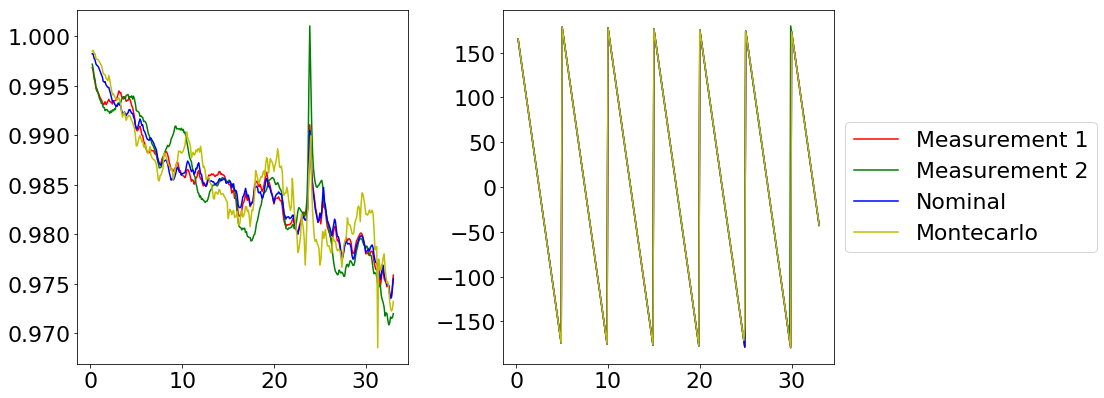

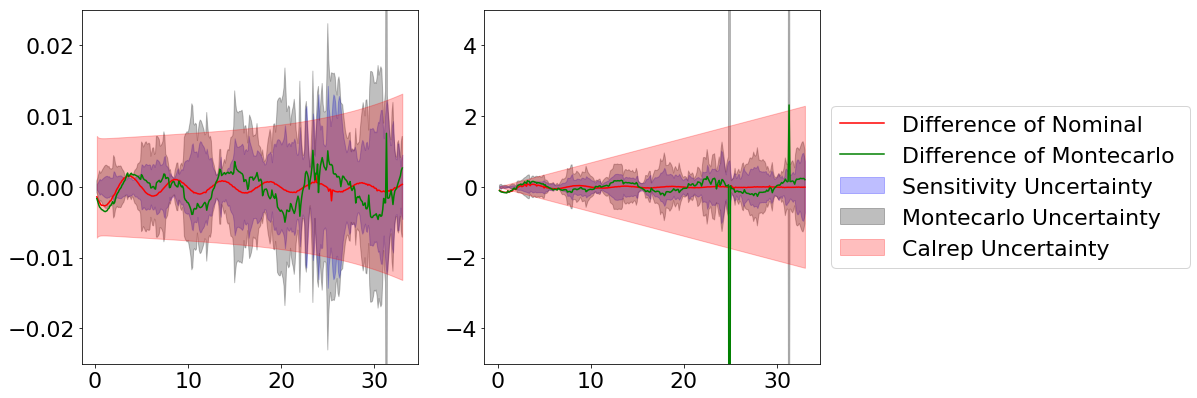

--------------------------------------------------------------------------------


In [157]:
test=plot_raw_MUF_comparison()

In [106]:
test

[[<Code.DataHandlers.NISTModels.OnePortRawModel instance at 0x000000006C6534C8>,
  <Code.DataHandlers.NISTModels.OnePortRawModel instance at 0x000000003C996A48>],
 [<Code.DataHandlers.GeneralModels.AsciiDataTable instance at 0x00000000207DBC48>,
  <Code.DataHandlers.GeneralModels.AsciiDataTable instance at 0x00000000207FF788>],
 <Code.DataHandlers.GeneralModels.AsciiDataTable instance at 0x000000004876A348>,
 <Code.DataHandlers.GeneralModels.AsciiDataTable instance at 0x0000000037C97AC8>]

TwoPortRawModel
--------------------------------------------------------------------------------
N203FW


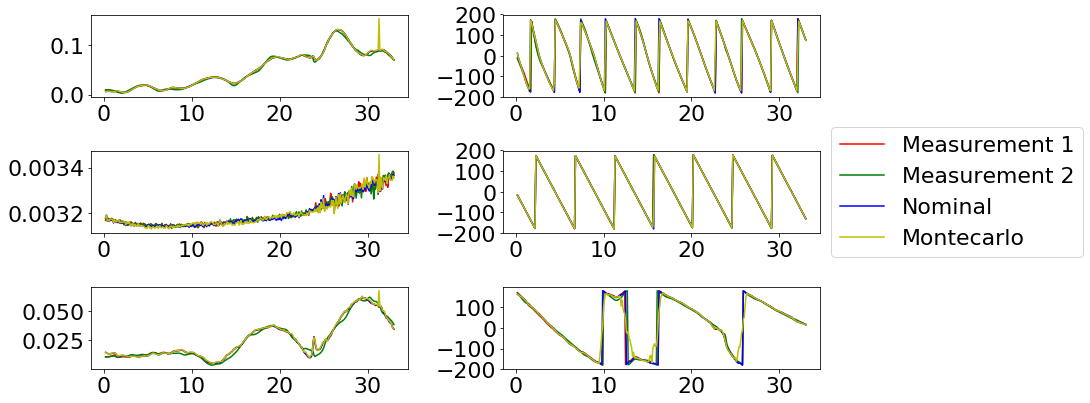

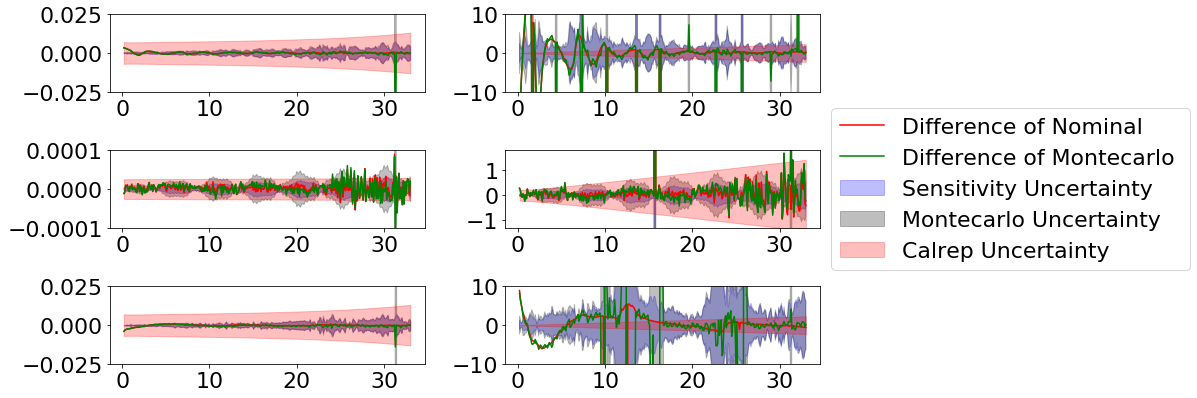

--------------------------------------------------------------------------------


[[<Code.DataHandlers.NISTModels.TwoPortRawModel instance at 0x0000000046FFF448>,
  <Code.DataHandlers.NISTModels.TwoPortRawModel instance at 0x00000000595B1CC8>],
 [<Code.DataHandlers.GeneralModels.AsciiDataTable instance at 0x0000000056888DC8>,
  <Code.DataHandlers.GeneralModels.AsciiDataTable instance at 0x0000000056887648>],
 <Code.DataHandlers.GeneralModels.AsciiDataTable instance at 0x0000000019231F88>,
 <Code.DataHandlers.GeneralModels.AsciiDataTable instance at 0x000000005F3BF748>]

In [168]:
plot_raw_MUF_comparison(raw_directory=r"C:\Share\35CalComp\35_ascii_results",
                            measurement_names=['N203FW.L1_030716','N203RV.L1_030716'],
                            nominal_path=r"C:\Share\35CalComp\MUF_results\DUTs\N203FW_Support\N203FW_0.s2p",
                            sensitivity_directory=r"C:\Share\35CalComp\MUF_results\DUTs\N203FW_Support\Covariance",
                            montecarlo_directory=r"C:\Share\35CalComp\MUF_results\DUTs\N203FW_Support\MonteCarlo")

OnePortRawModel
--------------------------------------------------------------------------------
M105P1
Saved plots C:\Share\35CalComp\Plots\M105P1_MUF_Multical_Comparison_Plot_20170523_002.png and C:\Share\35CalComp\Plots\M105P1_MUF_Multical_Difference_Plot_20170523_002.png


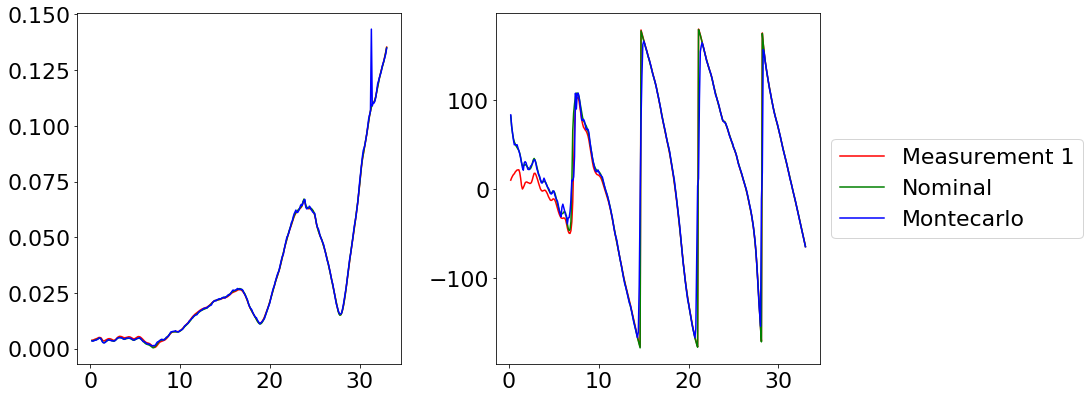

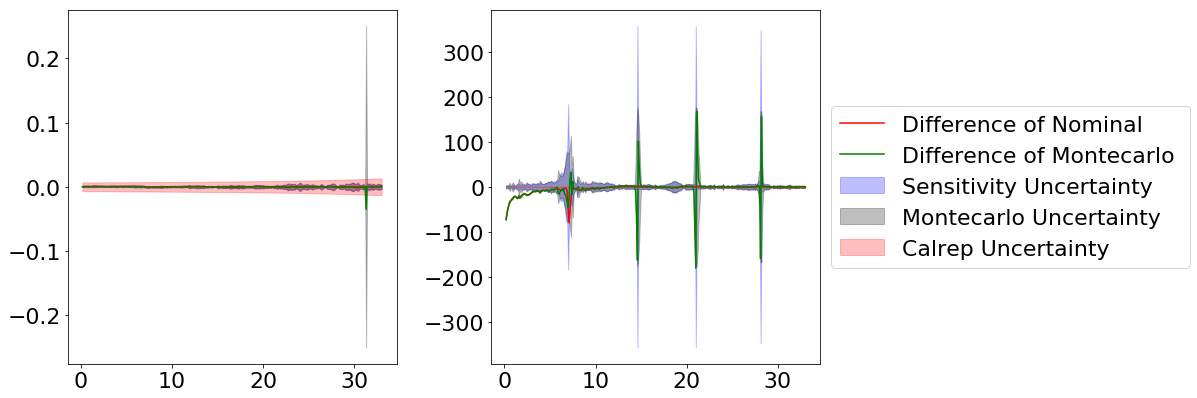

--------------------------------------------------------------------------------
OnePortRawModel
--------------------------------------------------------------------------------
N110P1
Saved plots C:\Share\35CalComp\Plots\N110P1_MUF_Multical_Comparison_Plot_20170523_002.png and C:\Share\35CalComp\Plots\N110P1_MUF_Multical_Difference_Plot_20170523_002.png


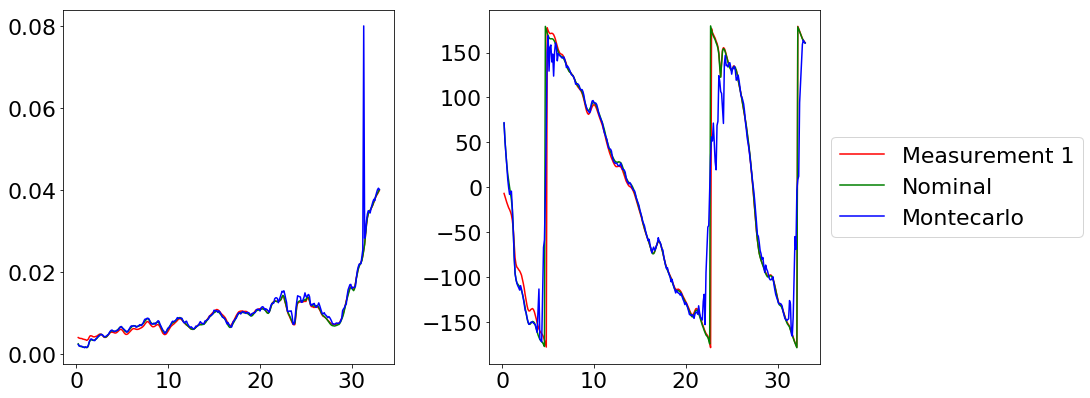

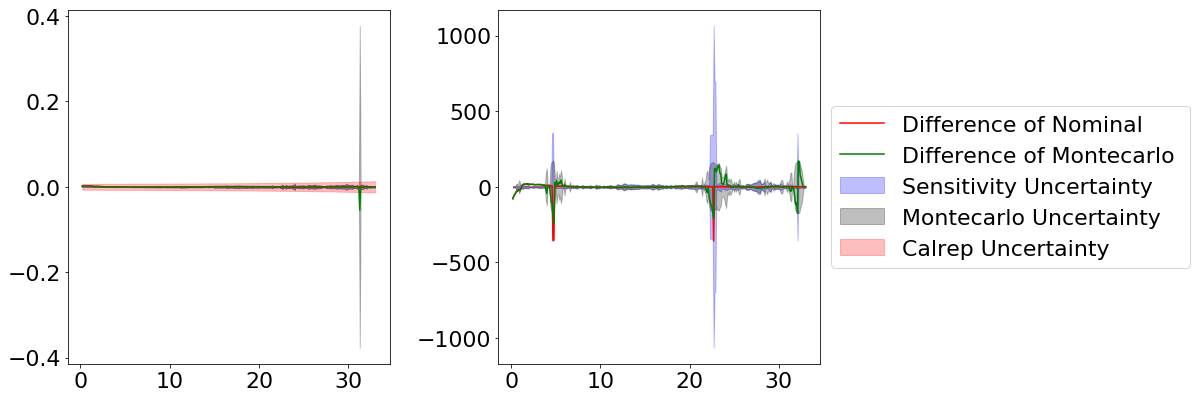

--------------------------------------------------------------------------------
OnePortRawModel
--------------------------------------------------------------------------------
N101P1
Saved plots C:\Share\35CalComp\Plots\N101P1_MUF_Multical_Comparison_Plot_20170523_002.png and C:\Share\35CalComp\Plots\N101P1_MUF_Multical_Difference_Plot_20170523_002.png


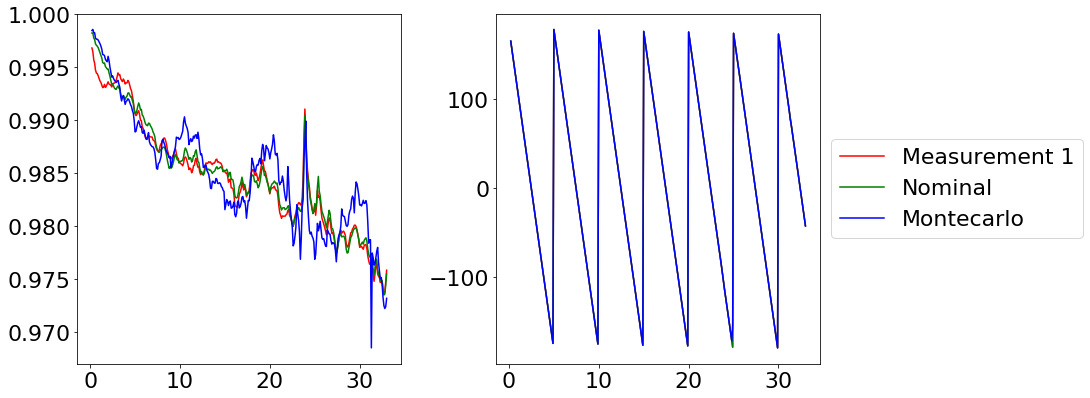

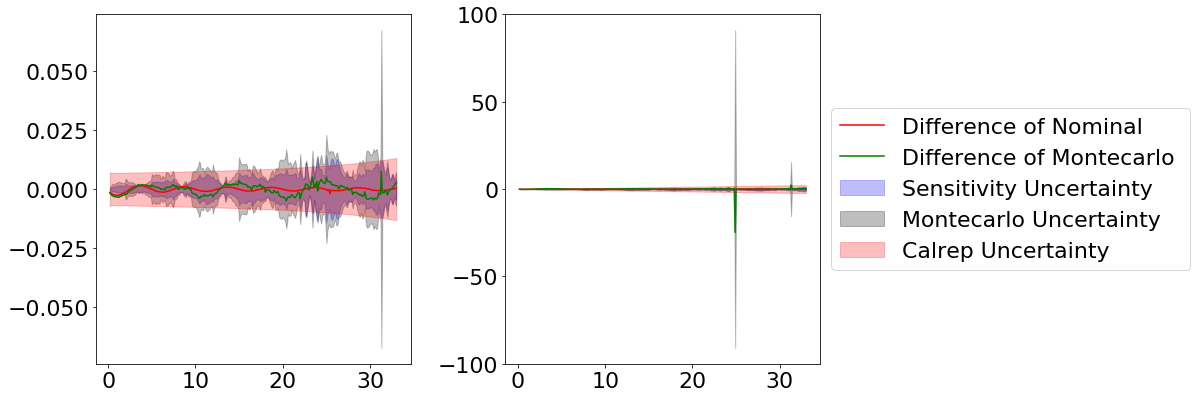

--------------------------------------------------------------------------------
OnePortRawModel
--------------------------------------------------------------------------------
N101P2
Saved plots C:\Share\35CalComp\Plots\N101P2_MUF_Multical_Comparison_Plot_20170523_002.png and C:\Share\35CalComp\Plots\N101P2_MUF_Multical_Difference_Plot_20170523_002.png


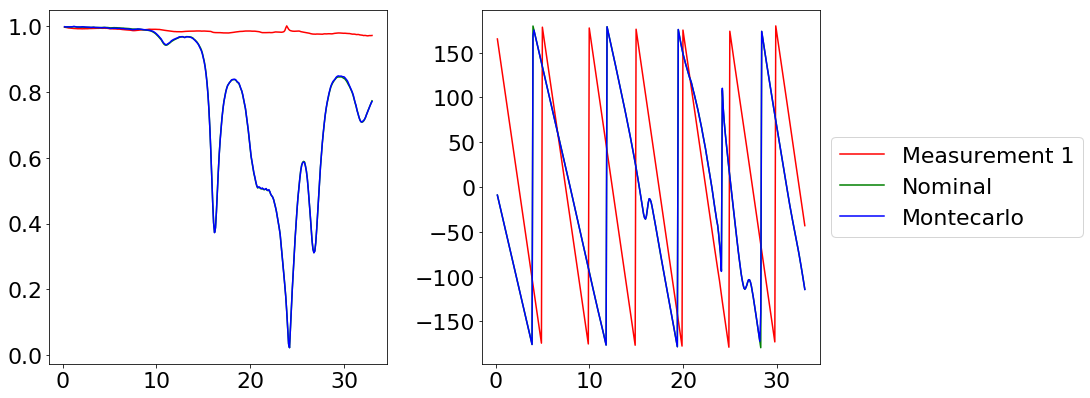

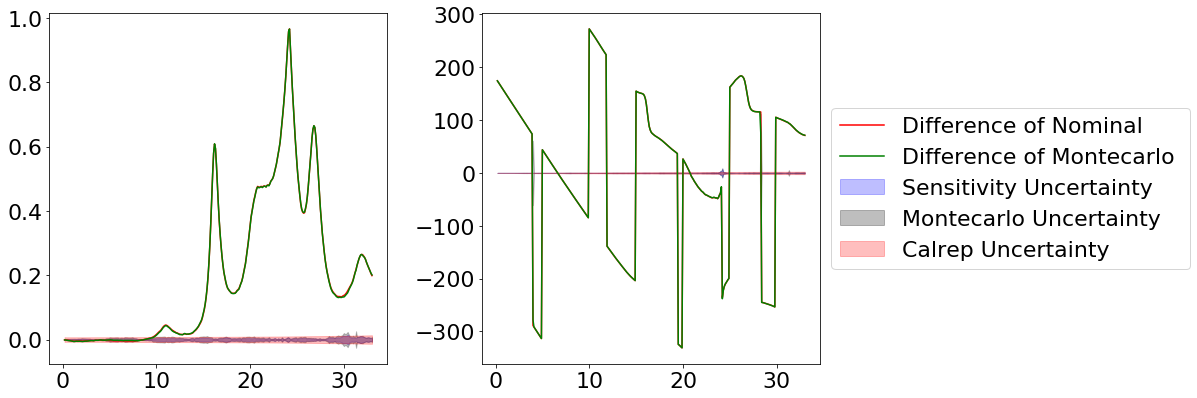

--------------------------------------------------------------------------------
TwoPortRawModel
--------------------------------------------------------------------------------
N203FW
Saved plots C:\Share\35CalComp\Plots\N203FW_MUF_Multical_Comparison_Plot_20170523_002.png and C:\Share\35CalComp\Plots\N203FW_MUF_Multical_Difference_Plot_20170523_002.png


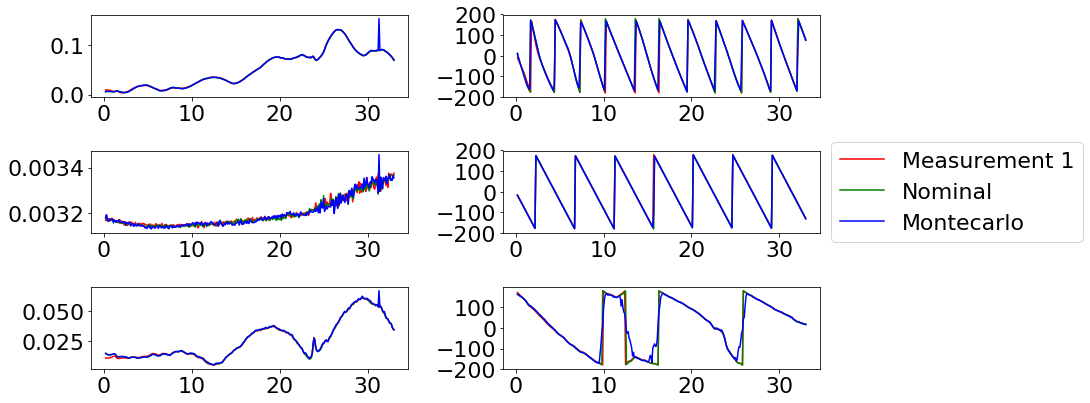

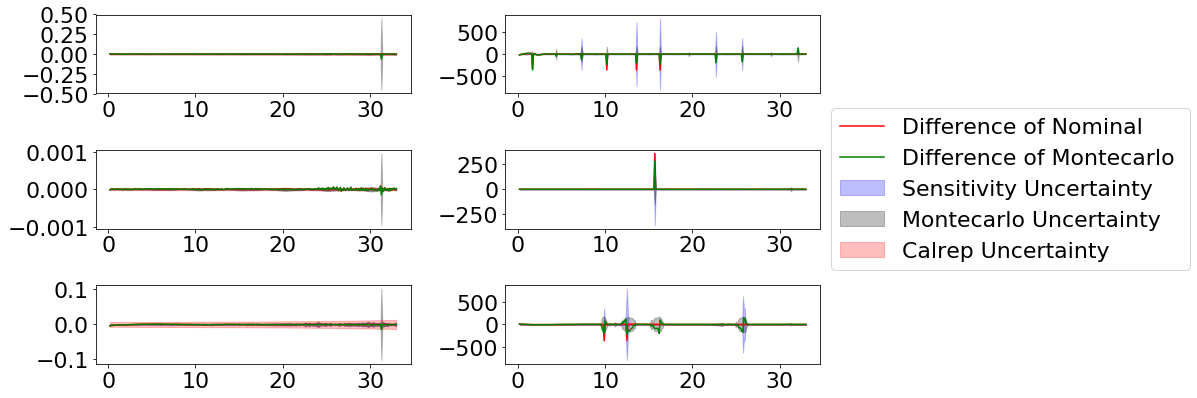

--------------------------------------------------------------------------------
TwoPortRawModel
--------------------------------------------------------------------------------
N203RV
Saved plots C:\Share\35CalComp\Plots\N203RV_MUF_Multical_Comparison_Plot_20170523_002.png and C:\Share\35CalComp\Plots\N203RV_MUF_Multical_Difference_Plot_20170523_002.png


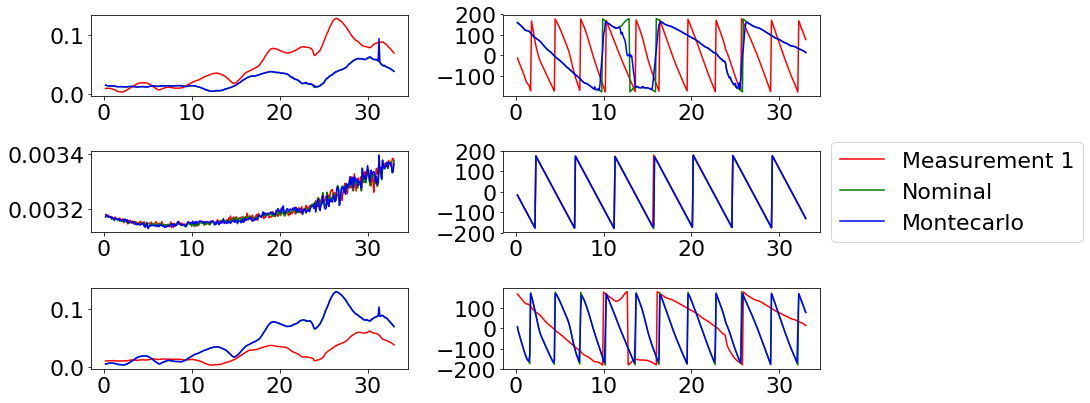

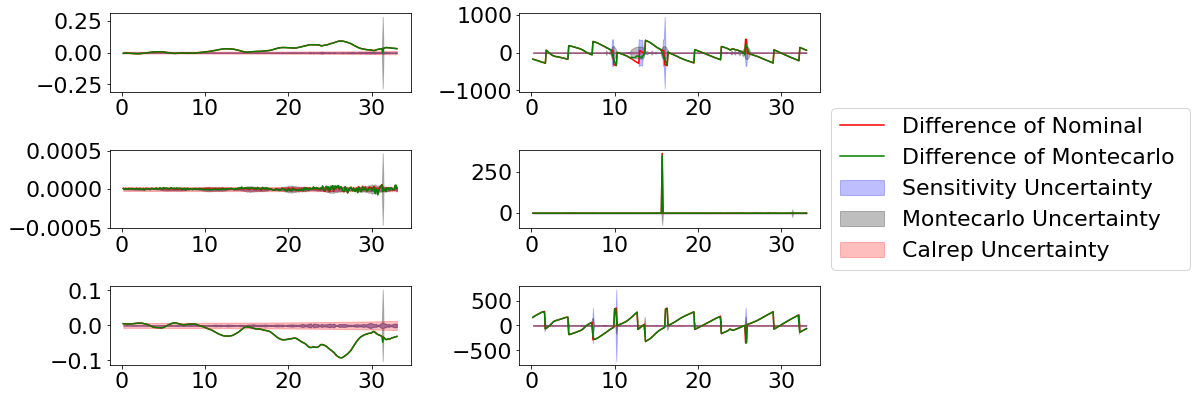

--------------------------------------------------------------------------------
TwoPortRawModel
--------------------------------------------------------------------------------
N205FW
Saved plots C:\Share\35CalComp\Plots\N205FW_MUF_Multical_Comparison_Plot_20170523_002.png and C:\Share\35CalComp\Plots\N205FW_MUF_Multical_Difference_Plot_20170523_002.png


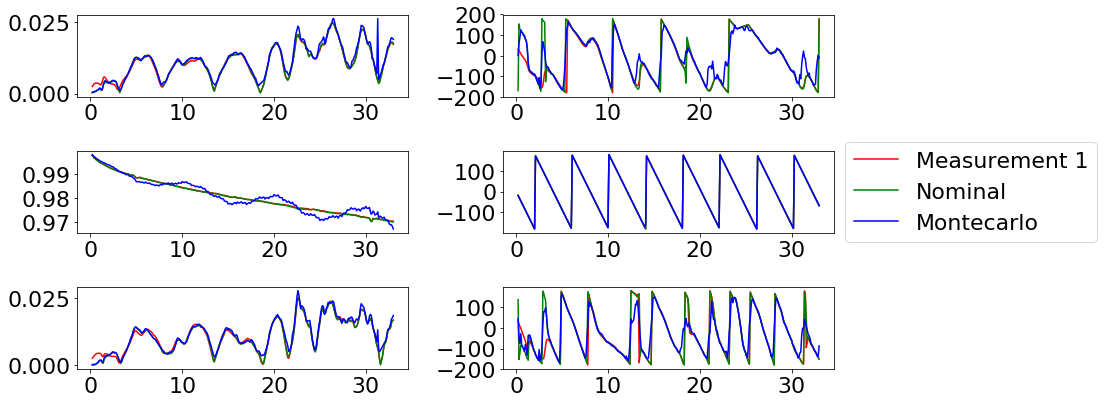

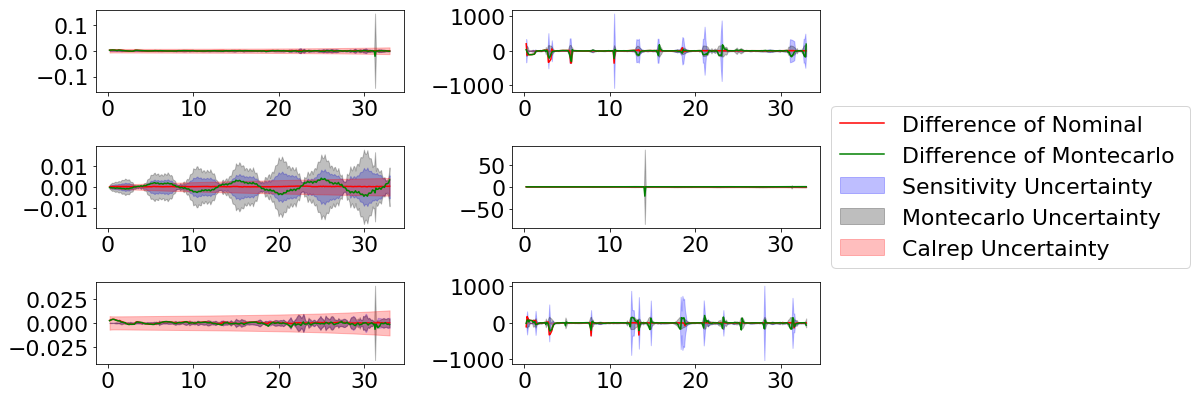

--------------------------------------------------------------------------------
TwoPortRawModel
--------------------------------------------------------------------------------
N205RV
Saved plots C:\Share\35CalComp\Plots\N205RV_MUF_Multical_Comparison_Plot_20170523_002.png and C:\Share\35CalComp\Plots\N205RV_MUF_Multical_Difference_Plot_20170523_002.png


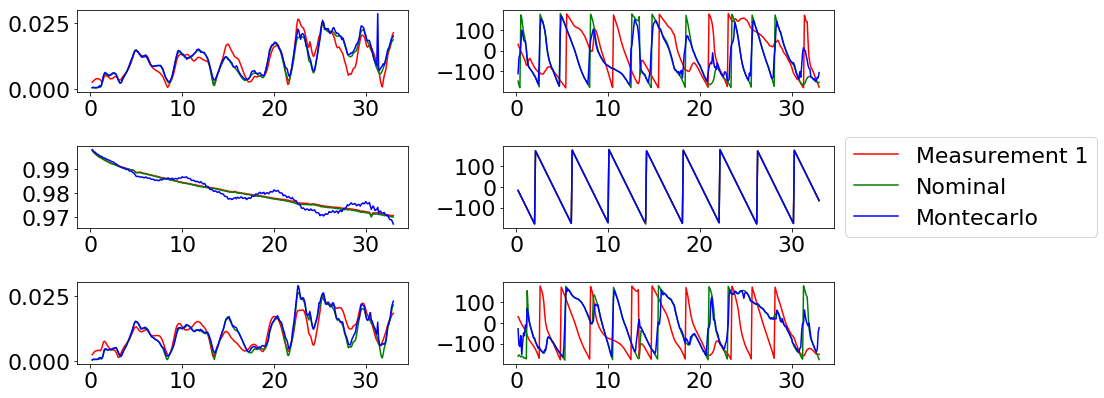

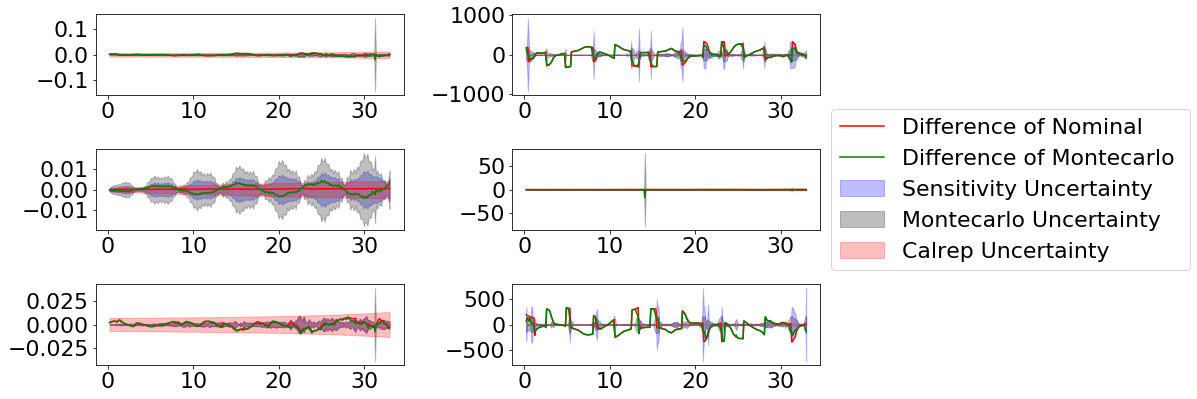

--------------------------------------------------------------------------------


In [184]:
devices=["M105P1","M110P1","N101P1","N101P2","N203FW","N203RV","N205FW","N205RV"]
for device in devices:
    try:
        plot_raw_MUF_comparison(raw_directory=r"C:\Share\35CalComp\35_ascii_results",
                            measurement_names=['{0}.L1_030716'.format(device)],
                            nominal_path=r"C:\Share\35CalComp\MUF_results\DUTs\{0}_Support\{0}_0.s2p".format(device),
                            sensitivity_directory=r"C:\Share\35CalComp\MUF_results\DUTs\{0}_Support\Covariance".format(device),
                            montecarlo_directory=r"C:\Share\35CalComp\MUF_results\DUTs\{0}_Support\MonteCarlo".format(device),
                            save_plots=True,directory=r"C:\Share\35CalComp\Plots")
    except:
        print("Could not process {0}".format(device))